Figure out the best hyper params for each hop

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def get_molecule_random_search_file_names(hop_num:int):
  return glob.glob(f'/content/drive/MyDrive/SpringBoard/Therapeutic Data Commons Projects/HyperParamTuning/RandomSearchOutcomes/results_hop_number__{hop_num}__*')


def load_random_search_dfs(hop_num):
  files = get_molecule_random_search_file_names(hop_num)

  dfs = [pd.read_csv(f, index_col=0) for f in files]

  return pd.concat(dfs, axis=0)

In [ ]:
three_hop = load_random_search_dfs(3)

In [ ]:
param_cols = [a for a in three_hop.columns if 'param' in a and 'params' not in a]
target ='mean_test_score'

In [ ]:
import matplotlib.pyplot as plt

def plot_randomized_search(df):
  for p in param_cols:
    plt.scatter(df['mean_test_score'], df[p], alpha=.1)
    plt.title(p)
    plt.xlabel('Score')
    plt.ylabel(p)
    plt.show()


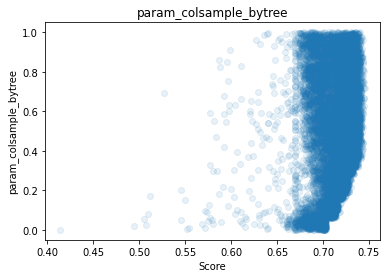

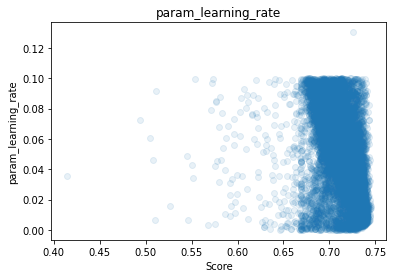

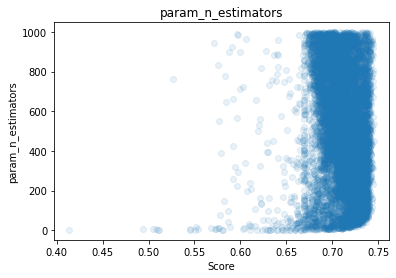

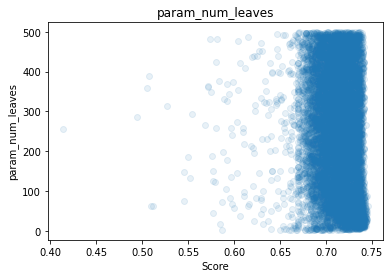

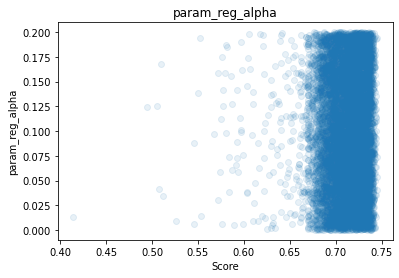

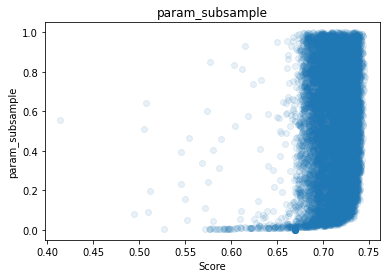

In [ ]:
zero_hop = load_random_search_dfs(0)

plot_randomized_search(zero_hop)

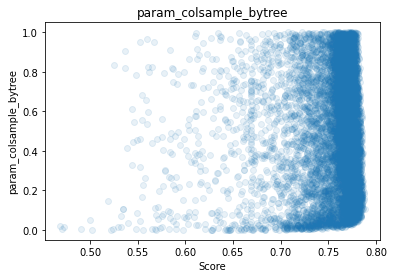

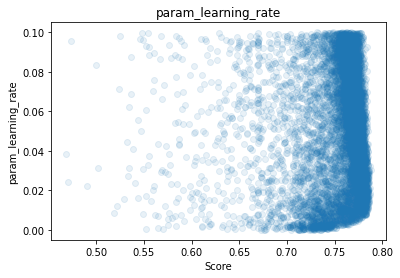

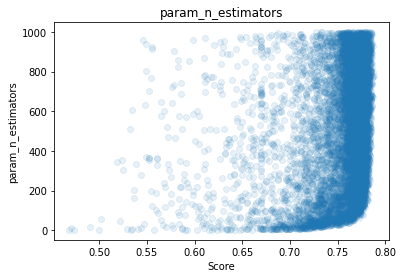

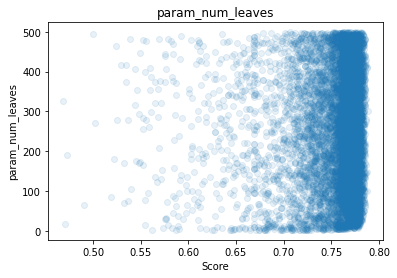

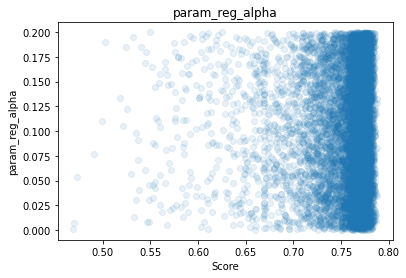

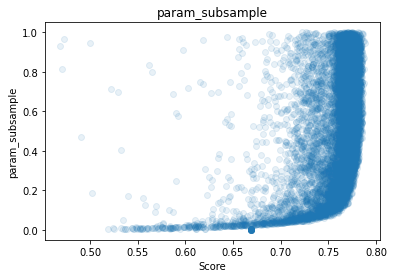

In [ ]:
one_hop = load_random_search_dfs(1)

plot_randomized_search(one_hop)

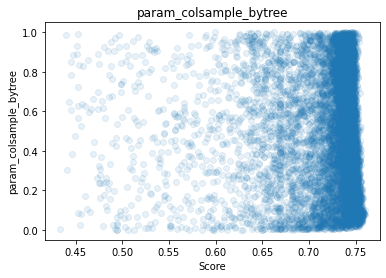

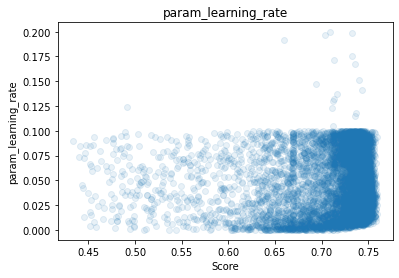

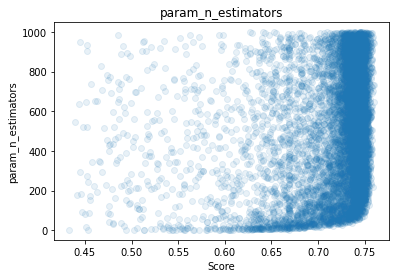

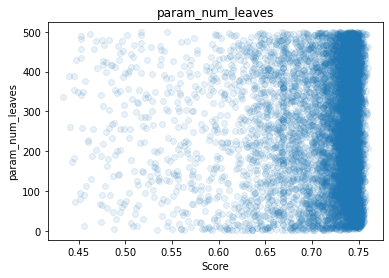

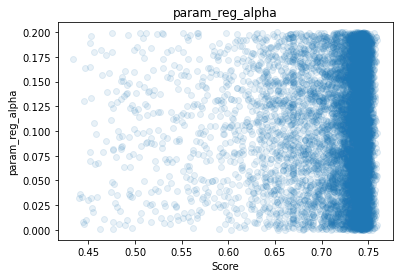

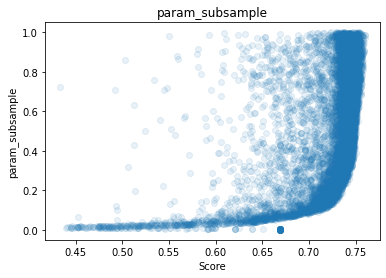

In [ ]:
two_hop = load_random_search_dfs(2)

plot_randomized_search(two_hop)

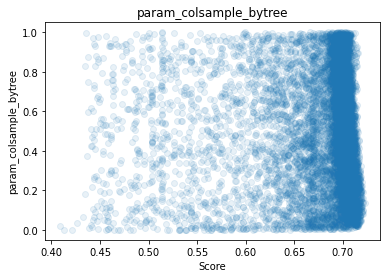

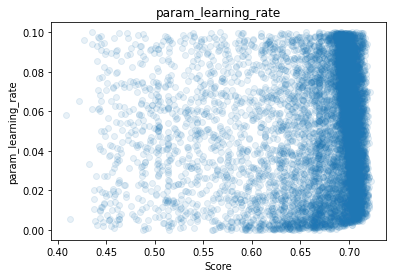

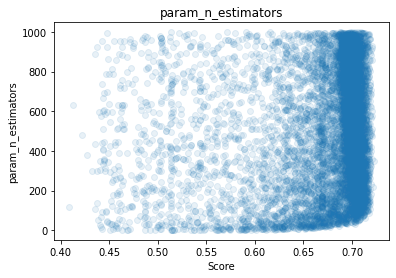

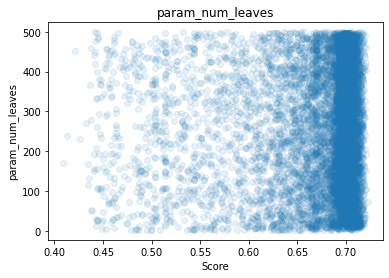

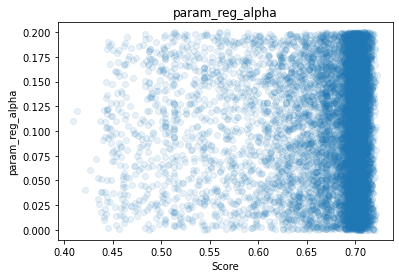

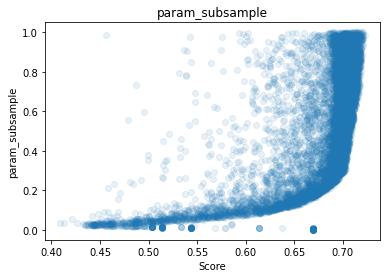

In [ ]:
three_hop = load_random_search_dfs(3)

plot_randomized_search(three_hop)

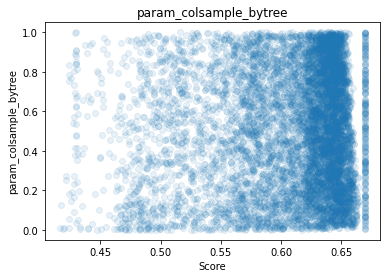

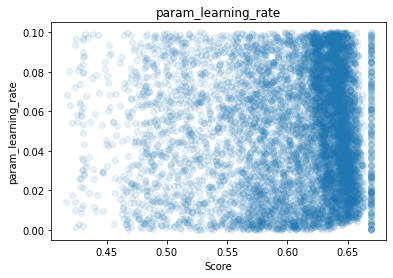

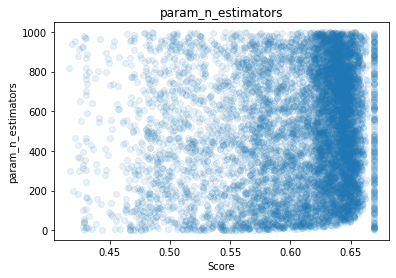

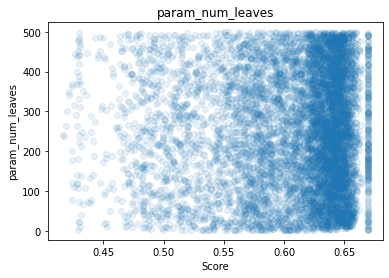

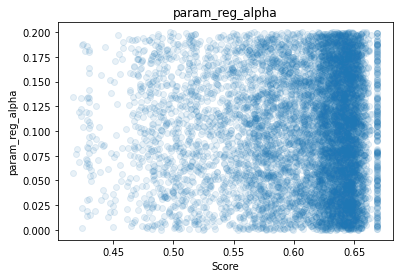

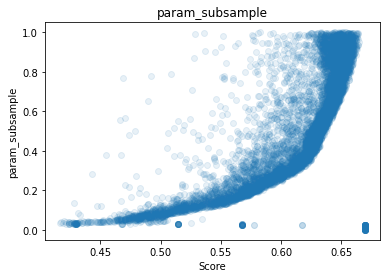

In [ ]:
four_hop = load_random_search_dfs(4)

plot_randomized_search(four_hop)

In [ ]:
def load_best_params(df):
  return df.sort_values('mean_test_score', ascending=False).loc[0]['params'].values[0]

In [ ]:
best_zero = load_best_params(zero_hop)
best_zero

"{'colsample_bytree': 0.45921506474872353, 'learning_rate': 0.003605978989205916, 'n_estimators': 997, 'num_leaves': 171, 'reg_alpha': 0.06136193030050688, 'subsample': 0.664374000848817}"

In [ ]:
best_one = load_best_params(one_hop)
best_one

"{'colsample_bytree': 0.19190373976042552, 'learning_rate': 0.018880733945270692, 'n_estimators': 772, 'num_leaves': 412, 'reg_alpha': 0.1319602189105627, 'subsample': 0.953435263598222}"

In [ ]:
best_two = load_best_params(two_hop)
best_two

"{'colsample_bytree': 0.0846115062976256, 'learning_rate': 0.061904626017968235, 'n_estimators': 710, 'num_leaves': 218, 'reg_alpha': 0.09722107305351997, 'subsample': 0.7625401046034898}"

In [ ]:
best_three = load_best_params(three_hop)
best_three

"{'colsample_bytree': 0.10234165146414909, 'learning_rate': 0.021876318417714605, 'n_estimators': 574, 'num_leaves': 193, 'reg_alpha': 0.08093256266597965, 'subsample': 0.9986613307559011}"

In [ ]:
best_four = load_best_params(four_hop)
best_four

"{'colsample_bytree': 0.29036206035748535, 'learning_rate': 0.09316958191707549, 'n_estimators': 473, 'num_leaves': 101, 'reg_alpha': 0.1992406954388929, 'subsample': 0.005705227464680718}"

In [ ]:
best_models = {0:best_zero,
               1:best_one,
               2: best_two,
               3: best_three,
               4: best_four,             
               }

In [ ]:
best_models

{0: "{'colsample_bytree': 0.45921506474872353, 'learning_rate': 0.003605978989205916, 'n_estimators': 997, 'num_leaves': 171, 'reg_alpha': 0.06136193030050688, 'subsample': 0.664374000848817}",
 1: "{'colsample_bytree': 0.19190373976042552, 'learning_rate': 0.018880733945270692, 'n_estimators': 772, 'num_leaves': 412, 'reg_alpha': 0.1319602189105627, 'subsample': 0.953435263598222}",
 2: "{'colsample_bytree': 0.0846115062976256, 'learning_rate': 0.061904626017968235, 'n_estimators': 710, 'num_leaves': 218, 'reg_alpha': 0.09722107305351997, 'subsample': 0.7625401046034898}",
 3: "{'colsample_bytree': 0.10234165146414909, 'learning_rate': 0.021876318417714605, 'n_estimators': 574, 'num_leaves': 193, 'reg_alpha': 0.08093256266597965, 'subsample': 0.9986613307559011}",
 4: "{'colsample_bytree': 0.29036206035748535, 'learning_rate': 0.09316958191707549, 'n_estimators': 473, 'num_leaves': 101, 'reg_alpha': 0.1992406954388929, 'subsample': 0.005705227464680718}"}

In [ ]:
import json

json.dump(best_models, open('/content/drive/MyDrive/SpringBoard/Therapeutic Data Commons Projects/HyperParamTuning/bestmodels.json', 'x'))